In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Load the Iris dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# df = pd.read_csv(url, header=None, names=column_names)
# df = pd.DataFrame(df)
# # Display the first few rows of the dataset
# df.head()

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [4]:
# read input file
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
# check if the read correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. What does the dataset look like?
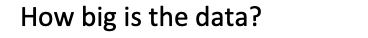
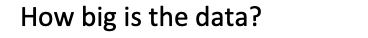
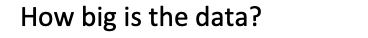
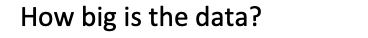

In [7]:
# The shape of the dataset. No of rows and cols present in the dataset.
df.shape

(891, 12)

In [8]:
# Displays a sample of 5 random rows form the dataset
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S


### 2. What are the types of columns in this dataset?

In [9]:
# Shows the datatypes of all cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- It can be observed that the columns Name, Sex, Ticket, Cabin, and Embark have string values (Categorical Values).
- Fields like Age, Cabin, and Embark have missing values.
- Age has been stored as floating point variable. This can be converted to integer to save memory.

### 3. Are there missing values or duplicate rows?

In [10]:
# Sum of nulls in a col
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin has majority of the values as null, so it does not contribute much to predict the result. Therefore, we can drop this column before performing analysis. 

In [11]:
# No. of duplicate rows
df.duplicated().sum()


np.int64(0)

- There are no duplicate rows in this dataset.

- **Note:** If there are any duplicate rows, they should dropped. *df.drop_duplicates()* can be used to drop duplicate rows.

### 4. More about the dataset?


In [12]:
# Gives insights on numerical cols only
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


5. Correlation between the columns?

In [15]:
# Gives pearson corr: -1 to 1.
# Not all cols are useful. In huge datasets, its important to identify the cols that really affect the result. It simplifies the dataset and makes the algorithm faster.
df.corr(method='pearson', numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [17]:
df.corr(numeric_only = True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

## Univariate Analysis 
#### Independent analysis of a single field in the dataset

In [19]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S


### 1. Categorical Data

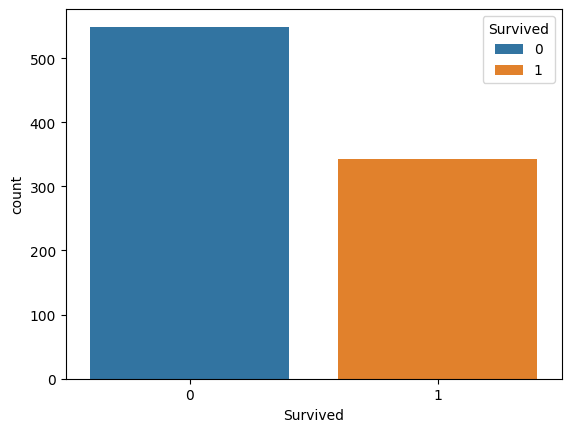

In [31]:
# Count Plot
sns.countplot(x="Survived", data=df, hue="Survived")
#sns.countplot(x="Pclass", data=df, hue="Survived")
#sns.countplot(x="Sex", data=df, hue="Survived")
plt.show()

In [29]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 2. Numerical Data

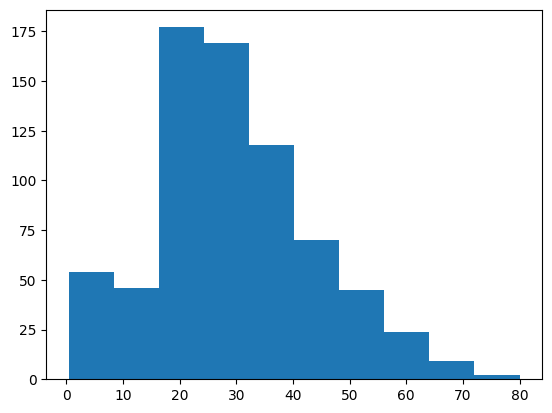

In [35]:
# Histogram
plt.hist(x="Age", data=df)
plt.show()

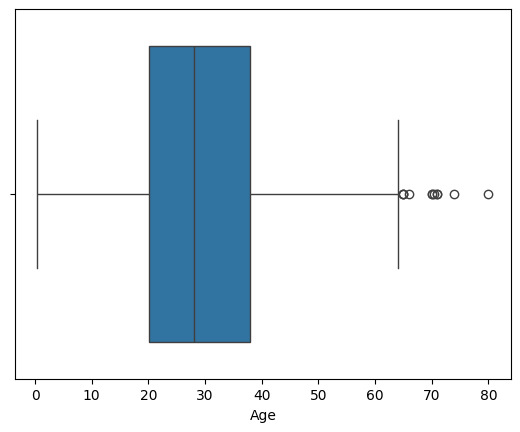

In [51]:
# Boxplot
sns.boxplot(x="Age", data=df)
# sns.boxplot(x="Fare", data=df)
plt.show()

In [54]:
# statiscal analysis
print("Min Age:", df["Age"].min())
print("Max Age:", df["Age"].max())
print("Mean Age:", df["Age"].mean())
print("Skew Age:", df["Age"].skew())

Min Age: 0.42
Max Age: 80.0
Mean Age: 29.69911764705882
Skew Age: 0.38910778230082704


## Bivariate Analysis 
#### Examining the relationship between two variables in the dataset
#### Multivariate Analysis: Examining the relationship between multiple variables in the dataset

### 1. Numerical - Numerical

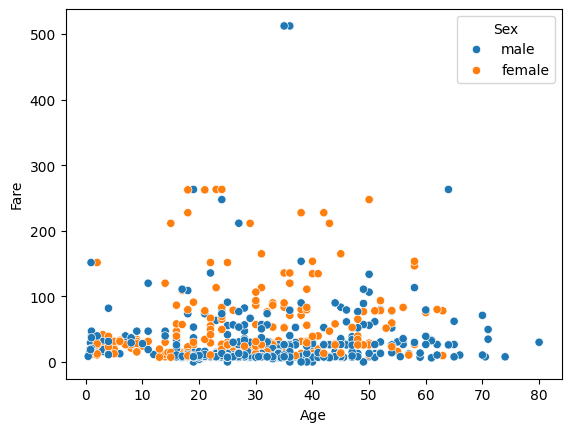

In [66]:
# Scatter Plot
#sns.scatterplot(x="Age", y="Fare", data=df)
sns.scatterplot(x="Age", y="Fare", data=df, hue="Sex")
#sns.scatterplot(x="Age", y="Fare", data=df, hue="Sex", style="Pclass")
plt.show()

### 2. Numerical - Categorical

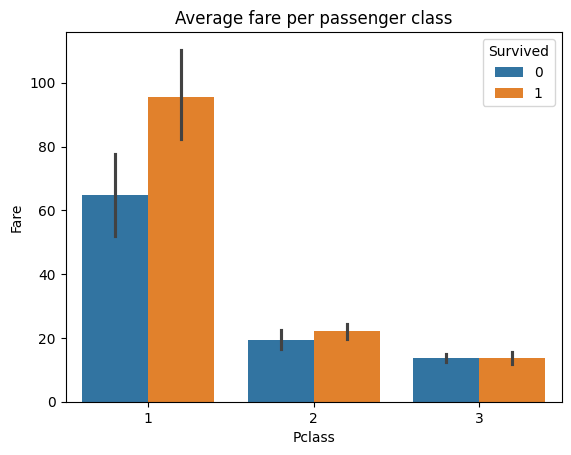

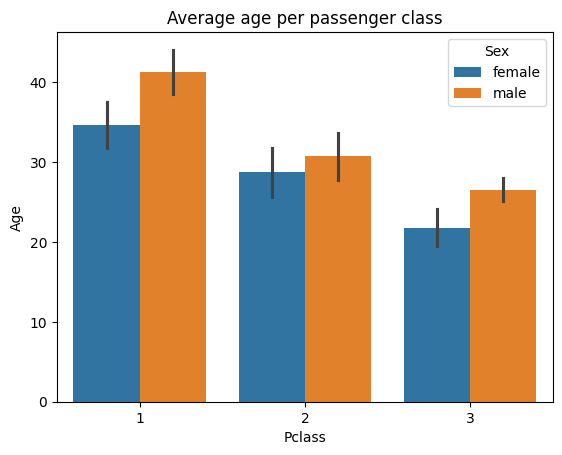

In [75]:
# Bar Plot
# Find average fare per passenger class
sns.barplot(x="Pclass", y="Fare", data=df, hue="Survived")
plt.title("Average fare per passenger class")
plt.show()
# Find average age per passenger class
sns.barplot(x="Pclass", y="Age", data=df, hue="Sex")
plt.title("Average age per passenger class")
plt.show()

/tmp/ipykernel_55/4074005333.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'], hist=False)
/tmp/ipykernel_55/4074005333.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'], hist=False)


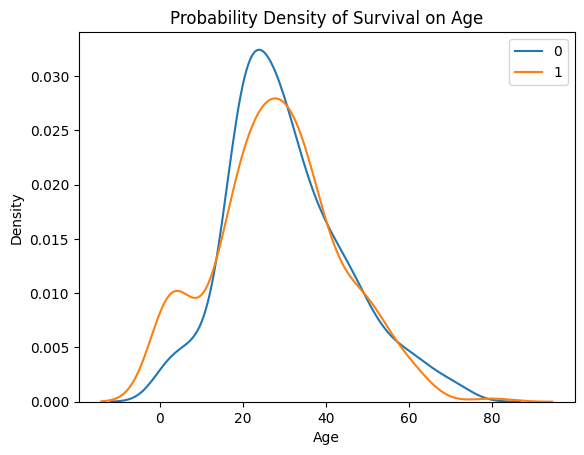

In [80]:
# Distplot
sns.distplot(df[df['Survived']==0]['Age'], hist=False)
sns.distplot(df[df['Survived']==1]['Age'], hist=False)
plt.title("Probability Density of Survival on Age")
plt.legend(df['Survived'])
plt.show()

### 3. Categorical - Categorical

In [81]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


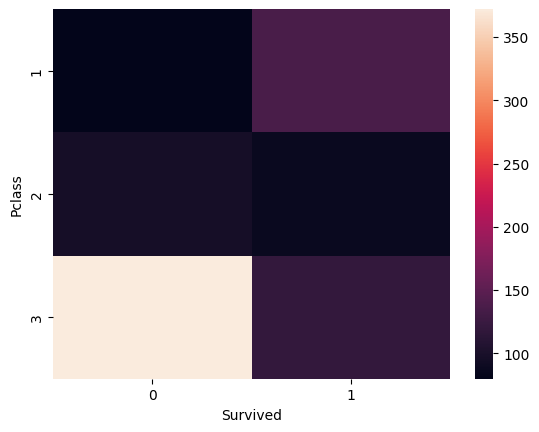

In [83]:
# Heatmap
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']))
plt.show()

In [88]:
# Calculates the average survival rate (percentage) for each 
# Passenger Class (1st, 2nd, and 3rd) in the dataset. 
df.groupby('Pclass')['Survived'].mean()*100
# df.groupby('Sex')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

## Assignment: Perform EDA on California Housing Prices